In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print("training set shape:",x_train.shape)
print("testing set shape:",x_test.shape)

training set shape: (50000, 32, 32, 3)
testing set shape: (10000, 32, 32, 3)


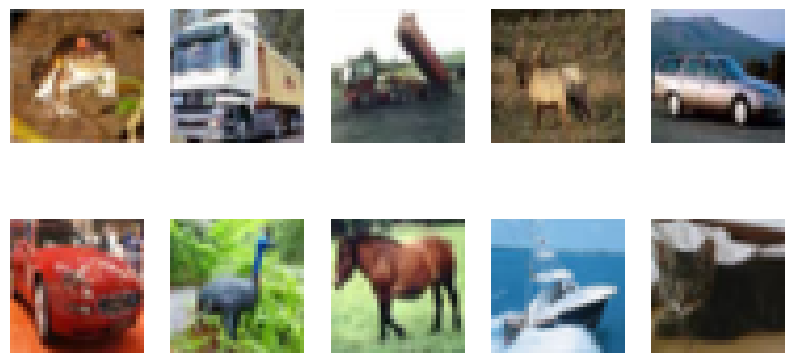

In [5]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')

plt.show()

In [6]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.3557 - loss: 1.7376 - val_accuracy: 0.5535 - val_loss: 1.2544
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5735 - loss: 1.2067 - val_accuracy: 0.6266 - val_loss: 1.0741
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6388 - loss: 1.0330 - val_accuracy: 0.6545 - val_loss: 0.9910
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6726 - loss: 0.9352 - val_accuracy: 0.6695 - val_loss: 0.9660
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7012 - loss: 0.8510 - val_accuracy: 0.6812 - val_loss: 0.9173
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7283 - loss: 0.7774 - val_accuracy: 0.6971 - val_loss: 0.8720
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7435 - loss: 0.7282 - val_accuracy: 0.6979 - val_loss: 0.8829
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7603 -

In [10]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7008 - loss: 0.8987
Test accuracy: 69.69%


In [11]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


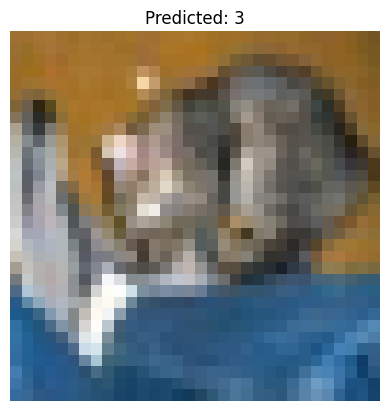

In [12]:
index = 0
plt.imshow(x_test[index])
plt.title(f"Predicted: {predicted_labels[index]}")
plt.axis('off')
plt.show()